# Baseline Model

Creating a baseline model is the goal after analysing the data.

## Problem definition

Defining the problem is crucial for a ML project. This defines the goal of the project and sets the development path.

## Problem Statement

For this project, following is the problem statement given: _"Use customers' default payments data from Taiwan and predict probability of default."_

## Data Sourcing

Core datasets are typically identified based on the problem statement. Based on exploratory analysis, more datasets can be added based on its availability. In some cases, public data can also be used. For example, weather data.

For this project, dataset has been downloaded from UCI website. There are no additional datasets available.

### Data Information

Source dataset provided contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

#### Dataset Attributes

Below is the schema for the source dataset:

|Column|Description|
|:---|:---|
|ID|_ID of each client_|
|LIMIT_BAL|_Amount of given credit in NT dollars (includes individual and family/supplementary credit_|
|SEX|_Gender (1=male, 2=female)_|
|EDUCATION|_(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)|
|MARRIAGE|_Marital status (1=married, 2=single, 3=others)_|
|AGE|_Age in years_|
|PAY_0|_Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)_|
|PAY_2|_Repayment status in August, 2005 (scale same as above)_|
|PAY_3|_Repayment status in July, 2005 (scale same as above)_|
|PAY_4|_Repayment status in June, 2005 (scale same as above)_|
|PAY_5|_Repayment status in May, 2005 (scale same as above)_|
|PAY_6|_Repayment status in April, 2005 (scale same as above)_|
|BILL_AMT1|_Amount of bill statement in September, 2005 (NT dollar)_|
|BILL_AMT2|_Amount of bill statement in August, 2005 (NT dollar)_|
|BILL_AMT3|_Amount of bill statement in July, 2005 (NT dollar)_|
|BILL_AMT4|_Amount of bill statement in June, 2005 (NT dollar)_|
|BILL_AMT5|_Amount of bill statement in May, 2005 (NT dollar)_|
|BILL_AMT6|_Amount of bill statement in April, 2005 (NT dollar)_|
|PAY_AMT1|_Amount of previous payment in September, 2005 (NT dollar)_|
|PAY_AMT2|_Amount of previous payment in August, 2005 (NT dollar)_|
|PAY_AMT3|_Amount of previous payment in July, 2005 (NT dollar)_|
|PAY_AMT4|_Amount of previous payment in June, 2005 (NT dollar)_|
|PAY_AMT5|_Amount of previous payment in May, 2005 (NT dollar)_|
|PAY_AMT6|_Amount of previous payment in April, 2005 (NT dollar_)|
|default.payment.next.month|_Default payment (1=yes, 0=no)_|

## Data Exploration

There are various techniques involved in data exploration. Data scientist works with data owner to interpret the data. Along with that, due to the nature of data handling, there can be cases where data tend to deviate from common understanding. In few cases, there can be unexpected data. All this needs to be cleansed and standardised before starting wiht model training.

### Loading dataset

Begin by loading data. Here we load data into Pandas dataframe.

In [1]:
import pandas as pd

In [2]:
pd_df = pd.read_csv('/home/cdsw/data/UCI_Credit_Card.csv.zip', compression='zip')

In [3]:
pd.set_option("display.max_columns", None)
pd_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# Display dataframe schema information
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Visualization

Visualization plan an important role in understanding the dataset. They provide a number of insights including patterns that are crucial for Machine Learning.

In CML, there are 3 common methods to perform visualization:
1. Use pre-installed visualization tools like matplotlib 
2. Install visualization libraries like Seaborn (python) etc.
3. Use [Cloudera Data Visualization](https://docs.cloudera.com/machine-learning/cloud/visualizations/topics/ml-native-visualizations.html)

#### Using pre-installed visualization tool

Standard Jupyter Runtime comes with Matplotlib pre-installed.

In [5]:
import matplotlib.pyplot as plt

#### Categorical columns

In this section, we use matplotlib to plot charts on Categorical columns one by one.

In [6]:
# List of categorical columns
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5' , 'PAY_6']

> Column name: SEX

<Axes: xlabel='SEX'>

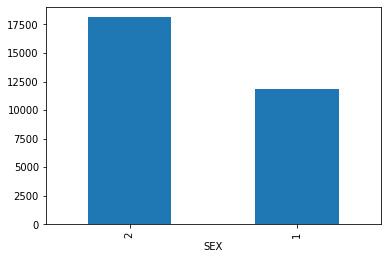

In [7]:
pd_df['SEX'].value_counts().plot(kind = 'bar')

In [8]:
pd_df.groupby(['SEX', 'default.payment.next.month']).size().unstack()

default.payment.next.month,0,1
SEX,,
1,9015,2873
2,14349,3763


In [9]:
#Calculate percent of values
gender = pd_df.groupby(['SEX', 'default.payment.next.month']).size().unstack()

gender_pct = (gender[1]/(gender[0]+gender[1]))*100
gender_pct

SEX
1    24.167227
2    20.776281
dtype: float64

<Axes: xlabel='SEX'>

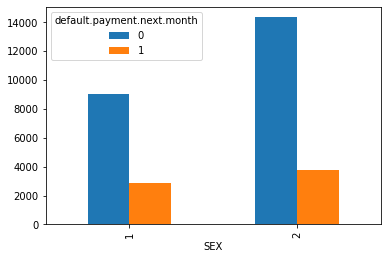

In [10]:
gender.plot(kind='bar')

> Column name: EDUCATION

In [11]:
pd_df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

<Axes: xlabel='EDUCATION'>

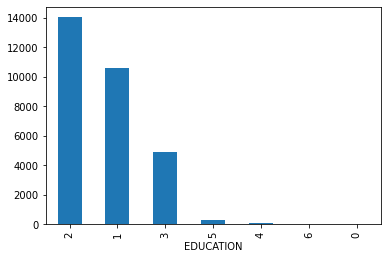

In [12]:
pd_df['EDUCATION'].value_counts().plot(kind='bar')

In [13]:
education = pd_df.groupby(['EDUCATION', 'default.payment.next.month']).size().unstack()
education = education.fillna(0)
education

default.payment.next.month,0,1
EDUCATION,,
0,14.0,0.0
1,8549.0,2036.0
2,10700.0,3330.0
3,3680.0,1237.0
4,116.0,7.0
5,262.0,18.0
6,43.0,8.0


In [14]:
education_pct = (education[1]/(education[0]+education[1]))*100
education_pct

EDUCATION
0     0.000000
1    19.234766
2    23.734854
3    25.157616
4     5.691057
5     6.428571
6    15.686275
dtype: float64

> Column name: MARRIAGE

In [15]:
pd_df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE'>

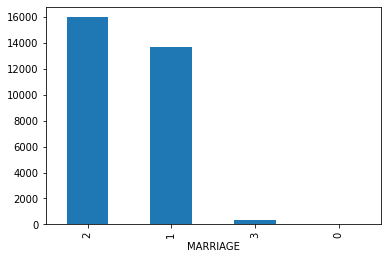

In [16]:
pd_df['MARRIAGE'].value_counts().plot(kind='bar')

Following function displays charts in grids:

In [17]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [18]:
pay_late = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5' , 'PAY_6']

In [19]:
pay_amt = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [20]:
bill_amt = ['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

> Column name: PAY

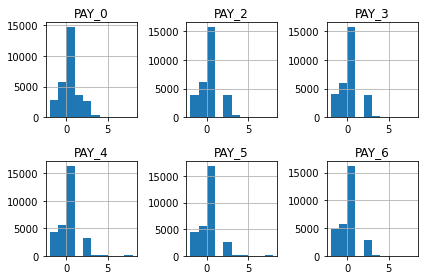

In [21]:
draw_histograms(pd_df[pay_late], pay_late, 2, 3, 10)

> Column name: PAY_AMT

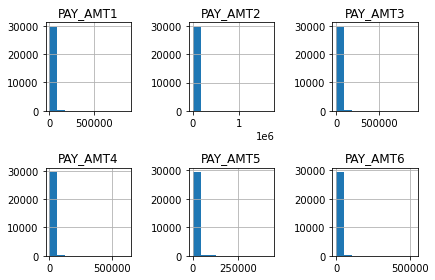

In [22]:
draw_histograms(pd_df[pay_amt], pay_amt, 2, 3, 10)

> Column name: AGE

<Axes: >

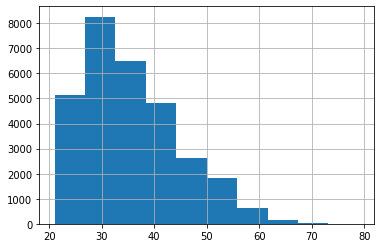

In [23]:
pd_df.AGE.hist()

> Column name: LIMIT_BAL

<Axes: >

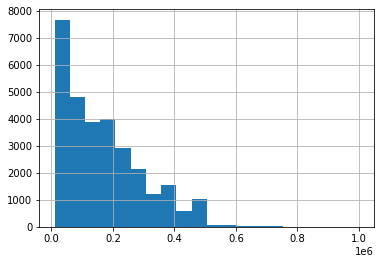

In [24]:
pd_df.LIMIT_BAL.hist(bins = 20)

### Pattern Analysis

In [25]:
pd_df[['PAY_AMT1', 'BILL_AMT1', 'PAY_AMT2', 'BILL_AMT2', 'PAY_AMT3', 'BILL_AMT3', 'BILL_AMT4', 'LIMIT_BAL', 'default.payment.next.month']].sample(10)

,PAY_AMT1,BILL_AMT1,PAY_AMT2,BILL_AMT2,PAY_AMT3,BILL_AMT3,BILL_AMT4,LIMIT_BAL,default.payment.next.month
12118,2070.0,36302.0,3995.0,33060.0,3113.0,33988.0,35112.0,150000.0,0
23484,19469.0,470579.0,20000.0,482733.0,12000.0,492718.0,282450.0,490000.0,0
10815,0.0,9829.0,0.0,9539.0,0.0,9244.0,8949.0,10000.0,1
7738,2039.0,45647.0,2000.0,45248.0,7000.0,33696.0,40092.0,80000.0,1
29999,2078.0,47929.0,1800.0,48905.0,1430.0,49764.0,36535.0,50000.0,1
10965,3007.0,59189.0,1503.0,35690.0,2017.0,33984.0,34384.0,80000.0,0
23147,2549.0,25386.0,2916.0,2542.0,4321.0,2916.0,4257.0,160000.0,0
17552,1600.0,46640.0,1600.0,47686.0,2000.0,48737.0,50157.0,110000.0,0
18640,6300.0,189748.0,5700.0,192338.0,5620.0,195598.0,188878.0,280000.0,0
8207,1738.0,43045.0,1653.0,42965.0,1516.0,43132.0,43995.0,50000.0,0


**PAY** columns denote the late pay. Let's analyse the correlation of this column.

In [26]:
pd_df[pd_df['PAY_0']>0][['PAY_0', 'PAY_AMT1', 'BILL_AMT2', 'PAY_AMT2', 'BILL_AMT3', 'PAY_AMT3']].sample(5)

,PAY_0,PAY_AMT1,BILL_AMT2,PAY_AMT2,BILL_AMT3,PAY_AMT3
20584,1,0.0,49804.0,2000.0,28662.0,1500.0
17076,3,4200.0,86918.0,4000.0,88624.0,3300.0
21225,1,1150.0,5355.0,1000.0,6113.0,2000.0
21564,1,0.0,66893.0,6507.0,72307.0,0.0
8834,1,2686.0,10321.0,6500.0,6244.0,3004.0


In [27]:
pd_df[(pd_df['PAY_0'] > 0) & (pd_df['PAY_2'] > 0) & (pd_df['PAY_3'] > 0) & (pd_df['PAY_4'] > 0) & (pd_df['PAY_5'] > 0) & (pd_df['PAY_6'] > 0)]\
[['PAY_0', 'PAY_AMT1', 'BILL_AMT1', 'PAY_2', 'PAY_AMT2', 'BILL_AMT2', 'PAY_3', 'PAY_AMT3', 'BILL_AMT3', 'PAY_4', 'PAY_AMT4', 'BILL_AMT4', 'PAY_5' , 'PAY_AMT5', 'BILL_AMT5', 'PAY_6', 'PAY_AMT6', 'BILL_AMT6', 'default.payment.next.month']].sample(5)

,PAY_0,PAY_AMT1,BILL_AMT1,PAY_2,PAY_AMT2,BILL_AMT2,PAY_3,PAY_AMT3,BILL_AMT3,PAY_4,PAY_AMT4,BILL_AMT4,PAY_5,PAY_AMT5,BILL_AMT5,PAY_6,PAY_AMT6,BILL_AMT6,default.payment.next.month
27549,1,2500.0,18361.0,2,0.0,20250.0,2,2403.0,19637.0,2,0.0,21705.0,2,3000.0,21059.0,2,0.0,23716.0,1
4882,2,4000.0,43205.0,2,0.0,46516.0,2,4000.0,45468.0,2,3000.0,48703.0,2,0.0,50774.0,2,3000.0,49514.0,1
12010,2,2700.0,82326.0,2,6500.0,82827.0,2,3200.0,87070.0,2,0.0,87961.0,2,6500.0,86445.0,2,0.0,91520.0,0
19264,1,3000.0,29386.0,2,1700.0,31596.0,2,1500.0,32492.0,2,0.0,33163.0,2,3000.0,32334.0,2,1402.0,34647.0,0
9979,8,0.0,35031.0,7,0.0,34552.0,6,0.0,33756.0,5,0.0,32960.0,4,0.0,31881.0,3,0.0,31085.0,1


In [28]:
df_corr = pd_df[['PAY_0', 'PAY_AMT1', 'BILL_AMT1', 'PAY_2', 'PAY_AMT2', 'BILL_AMT2', 'PAY_3', 'PAY_AMT3', 'BILL_AMT3', 'PAY_4', 'PAY_AMT4', 'BILL_AMT4', 'PAY_5' , 'PAY_AMT5', 'BILL_AMT5', 'PAY_6', 'PAY_AMT6', 'BILL_AMT6', 'default.payment.next.month']].corr()

#### Using non-preinstalled packages (Seaborn)

In [29]:
!pip install seaborn

In [30]:
import seaborn as sns

Plotting correlation between columns using Seaborn heatmap

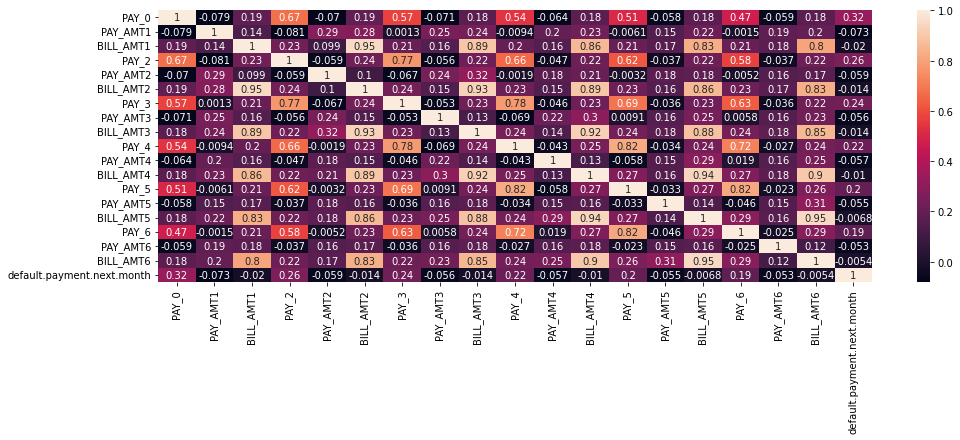

In [31]:
plt.figure(figsize = (16,5))

#ax = sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5)
ax = sns.heatmap(df_corr, annot=True,
        xticklabels=df_corr.columns,
        yticklabels=df_corr.columns)

In [32]:
pd_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5' , 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [33]:
pd_df[(pd_df['BILL_AMT1'] > pd_df['LIMIT_BAL']) | (pd_df['BILL_AMT2'] > pd_df['LIMIT_BAL']) | (pd_df['BILL_AMT2'] > pd_df['LIMIT_BAL']) | (pd_df['BILL_AMT3'] > pd_df['LIMIT_BAL']) | \
      (pd_df['BILL_AMT4'] > pd_df['LIMIT_BAL']) | (pd_df['BILL_AMT5'] > pd_df['LIMIT_BAL']) | (pd_df['BILL_AMT6'] > pd_df['LIMIT_BAL'])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
15,16,50000.0,2,3,3,23,1,2,0,0,0,0,50614.0,29173.0,28116.0,28771.0,29531.0,30211.0,0.0,1500.0,1100.0,1200.0,1300.0,1100.0,0
40,41,360000.0,1,1,2,33,0,0,0,0,0,0,218668.0,221296.0,206895.0,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
49,50,20000.0,1,1,2,24,0,0,0,0,0,0,17447.0,18479.0,19476.0,19865.0,20480.0,20063.0,1318.0,1315.0,704.0,928.0,912.0,1069.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29980,29981,50000.0,1,3,2,42,0,0,0,0,0,0,43998.0,49123.0,49397.0,50360.0,19971.0,19694.0,10000.0,4000.0,5000.0,3000.0,4500.0,2000.0,0
29988,29989,250000.0,1,1,1,34,0,0,0,0,0,0,279640.0,252913.0,243075.0,245750.0,175005.0,179687.0,65000.0,8800.0,9011.0,6000.0,7000.0,6009.0,0
29992,29993,10000.0,1,3,1,43,0,0,0,-2,-2,-2,8802.0,10400.0,0.0,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0
29993,29994,100000.0,1,1,2,38,0,-1,-1,0,0,0,3042.0,1427.0,102996.0,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0


In [34]:
pd_df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

<Axes: >

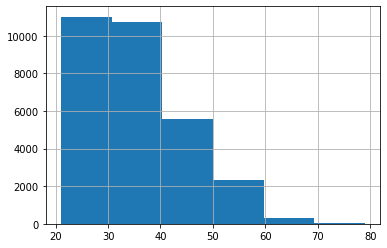

In [35]:
pd_df.AGE.hist(bins = 6)

## Observations
Based on the analysis so far, following observations are made:
1. No null values
2. More women in dataset than men
3. Unknown value of 0 found for education - can be classified as others or unknown
4. 2 values marked as unknown for education - 5 & 6. Values 0, 5 & 6 can be merged to create 'unknown' group
5. **Assumption** - Pay columns are determined for a window which includes more than 6 months. Otherwise, pay delay of 2 months for every month and value more than 6 do not make sense.
6. Minor correlation exists between pay delay and default.
7. There are 3931 customer with bill amount greater than their limit in last 6 months.

This data is cleansed mostly so far. However, this will not be the case in most scenarios. Users often have to identify and deploy techniques to cleanse source dataset.

## Data Cleansing

Using the observation, following data cleansing steps are identified:

**Education**

In [36]:
df_clean = pd_df.replace({'EDUCATION': {0 : 5, 6: 5}})

**Marriage**

In [37]:
df_clean = df_clean.replace({'MARRIAGE' : {0: 3}})

In [38]:
df_clean = df_clean.drop('ID', axis=1)

**PAY Delay Columns**

In [39]:
pay_late_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5' , 'PAY_6']

In [40]:
for col in pay_late_cols:
    df_clean.replace({col: {-2: 0, -1: 0}})

## Feature Engineering

Feature Engineering is a technique that leverages the information in training data to create new variables. This is proven to enhance model accuracy. 

In this version, feature engineering is not used but below are some sample for reference.

#### Ratios

1. Payment amount to Bill amount ratio -> Higher the ratio, lower the risk
 > - Further investigation is required for proper derivation of the column
2. Expenses + Interest = Current bill - Previous bill - Previous payment
 > - Further investigation is required for proper derivation of the column
3. Bill amount to limit amount ratio -> Higher the ratio, higher the risk

Below is a code snippet to create Bill-to-loan-amount-ratio:<br>
blr_cols = []
for mth in range(1, 7, 1):
    blr_cols.append(['BLR'+str(mth), 'BILL_AMT'+str(mth)])
    

for col_blr in blr_cols:
    df_clean[col_blr[0]] = df_clean[col_blr[1]] / df_clean['LIMIT_BAL']

#### Age bucketing

Instead of using age as an integer value, creating Age buckets provide a better generalisation.

bins= [20, 30, 40, 50, 60, 100]
labels = [1, 2, 3, 4, 5]
df_clean['AGE_GROUP'] = pd.cut(df_clean['AGE'], bins=bins, labels=labels, right=False)
df_clean = df_clean.drop('AGE', axis=1)

## Model Training

After feature engineering, it is time for model training to create a baseline model. This model provides a benchmark to further apply ML techniques to improve model accuracy while avoiding bias in the model.

For this use case, we use Scikit Learn package.

### Train Test split

First step in model training is to split data into train and test datasets. Train data is used to train the model and test data is used to validate model accuracy.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df_clean.drop('default.payment.next.month', axis=1) 

In [43]:
y = df_clean['default.payment.next.month']

In [44]:
X.shape, y.shape

((30000, 23), (30000,))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

### Oversampling

Imbalanced data can lead to bias in the model which can lead to model failing to predict the category for which there is less data. Oversampling is a technique deployed to balance dataset.

#### Training model on imbalanced dataset

In [46]:
from sklearn.ensemble import RandomForestClassifier 

In [47]:
rf_clf = RandomForestClassifier(n_estimators = 200, class_weight = "balanced")

In [48]:
%timeit
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200)

#### Scoring the model

After training the model, it is scored.

In [49]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score

In [50]:
def score_classifier(pred, test):
    print("F1 score: \t\t{}".format(round(f1_score(y_true = test, y_pred = pred),3)))
    print("Accuracy score: \t{}".format(round(accuracy_score(y_true = test, y_pred = pred),3)))
    print("Precision: \t\t{}".format(round(precision_score(y_true = test, y_pred = pred),3)))
    print("Recall: \t\t{}".format(round(recall_score(y_true = test, y_pred = pred),3)))

In [51]:
y_pred = rf_clf.predict(X_test)

In [52]:
score_classifier(y_pred, y_test)

F1 score: 		0.454
Accuracy score: 	0.818
Precision: 		0.668
Recall: 		0.343


It can noted from above that model has an accuracy of 81.8% but F1 score is only 0.456. This means that there is bias in training dataset.

#### SMOTE oversampling

Synthetic Minority Over-sampling TEchnique (SMOTE) is a oversampling technique.

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22500, 23), (22500,), (7500, 23), (7500,))

In [55]:
sm = SMOTE(random_state=44, sampling_strategy = 'minority')
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

35026
17513


#### Training after oversampling

In [56]:
from sklearn.ensemble import RandomForestClassifier 

In [57]:
rf_clf_os = RandomForestClassifier(n_estimators = 200, class_weight = "balanced")

In [58]:
%timeit
rf_clf_os.fit(X_SMOTE, y_SMOTE)

RandomForestClassifier(class_weight='balanced', n_estimators=200)

#### Scoring model training after oversampling

In [59]:
y_pred_os = rf_clf_os.predict(X_test)

In [60]:
score_classifier(y_pred_os, y_test)

F1 score: 		0.489
Accuracy score: 	0.779
Precision: 		0.498
Recall: 		0.48


It can be noted that accuracy has dropped slightly down to 77.9% but F1 score has improved to 0.489 from 0.456.

### Store model

Newest feature in CML is Model Registry which is a good feature to version models and compare them. Users can also choose to store models elsewhere including local disk.

In [61]:
import pickle

In [63]:
pickle.dump(rf_clf, open('../model/rc_clf.pkl', 'wb'))
pickle.dump(rf_clf_os, open('../model/rc_clf_os.pkl', 'wb'))

Next step is to use CML Experiments feature to compare different models and different parameters for each models.

---------

#### Experiment \#1

***
<font color="blue">Model performance is very low. This could be because of train_test_split. To improve performance, let's use StratifiedShuffleSplit</font>

In [158]:
from sklearn.model_selection import StratifiedShuffleSplit

def split_data(X, y):
    gss = StratifiedShuffleSplit(n_splits=1, train_size=.75, random_state=44) # only one split
    for train_idx, test_idx in gss.split(X,y):
        X_train_gss = X.iloc[train_idx]
        y_train_gss = y.iloc[train_idx]
        X_test_gss = X.iloc[test_idx]
        y_test_gss = y.iloc[test_idx]
    return X_train_gss, X_test_gss, y_train_gss, y_test_gss
    

In [159]:
X_train_gss, X_test_gss, y_train_gss, y_test_gss = split_data(X, y)

In [160]:
rf_clf_gss = RandomForestClassifier(n_estimators = 200, class_weight = "balanced")

In [161]:
rf_clf_gss.fit(X_train_gss, y_train_gss)

RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [163]:
y_pred_gss = rf_clf_gss.predict(X_test_gss)

In [164]:
score_classifier(y_pred_gss, y_test_gss)

F1 score: 		0.442
Accuracy score: 	0.814
Precision: 		0.656
Recall: 		0.333


#### Experiment \#2

***
<font color="blue">Applying oversampling on GSS split dataset. Using SMOTENC instead of SMOTE</font>

In [185]:
from imblearn.over_sampling import SMOTENC

In [204]:
sm_gss = SMOTENC(categorical_features = cat_cols, random_state=44, k_neighbors=10, sampling_strategy = 'auto')
X_SMOTE_gss, y_SMOTE_gss = sm.fit_resample(X_train_gss, y_train_gss)
print(len(y_SMOTE))
print(y_SMOTE.sum())

35026
17513


In [215]:
rf_clf_gss_os = RandomForestClassifier(n_estimators = 100, class_weight = "balanced")

In [216]:
rf_clf_gss_os.fit(X_SMOTE_gss, y_SMOTE_gss)

RandomForestClassifier(class_weight='balanced')

In [217]:
y_pred_gss_os = rf_clf_gss_os.predict(X_test_gss)

In [218]:
score_classifier(y_pred_gss_os, y_test_gss)

F1 score: 		0.492
Accuracy score: 	0.784
Precision: 		0.514
Recall: 		0.471


# Conclusion

GSS did not produce a better result. Further experimentation is required.

## Custom ML Runtime

Refer notebook [Custom ML Runtime](../notebooks/2_Custom_ML_Runtime.ipynb) for next steps